In [1]:
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
import json
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen


In [ ]:
# get data
parser = Sbopen()
match_files = [19789, 19794, 19805]
df = pd.concat([parser.event(file)[0] for file in match_files])  # 0 index is the event file
df

In [ ]:
# filter chelsea pressure and pass events
mask_chelsea_pressure = (df.team_name == 'Chelsea FCW') & (df.type_name == 'Pressure')
df_pressure = df.loc[mask_chelsea_pressure, ['x', 'y']]
mask_chelsea_pressure = (df.team_name == 'Chelsea FCW') & (df.type_name == 'Pass')
df_pass = df.loc[mask_chelsea_pressure, ['x', 'y', 'end_x', 'end_y']]
df_pass

In [2]:
# Open the file and load its contents into a dictionary
with open('../data/StatsBomb/Data/ManCity_Arsenal_events.json', 'r') as f:
    data = json.load(f)
# Convert the list of JSON values to a DataFrame
df = pd.json_normalize(data)

mask_mcw_pressure = (df['team.name'] == 'Manchester City WFC') & (df['type.name'] == 'Pressure')
df_pressure  = df.loc[mask_mcw_pressure, ['location','player.name','pass.recipient.name']]
df_pressure ['x'] = [axes[0] for axes in df_pressure ['location'].values]
df_pressure ['y'] = [axes[1] for axes in df_pressure ['location'].values]




mask_mcw_pressure = (df['team.name'] == 'Manchester City WFC') & (df['type.name'] == 'Pass')
df_pass  = df.loc[mask_mcw_pressure, ['location','pass.end_location','player.name','pass.recipient.name']]
df_pass ['x'] = [axes[0] for axes in df_pass ['location'].values]
df_pass ['y'] = [axes[1] for axes in df_pass ['location'].values]
df_pass ['end_x'] = [axes[0] for axes in df_pass ['pass.end_location'].values]
df_pass ['end_y'] = [axes[1] for axes in df_pass ['pass.end_location'].values]




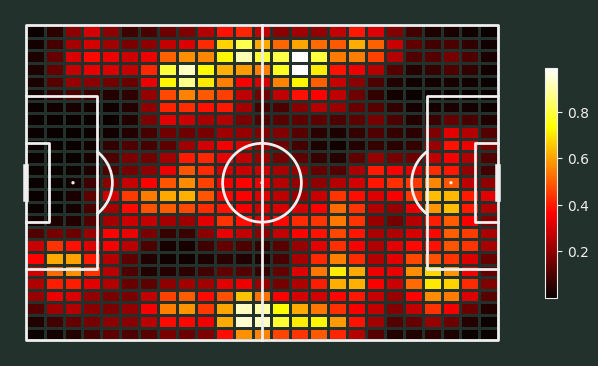

In [3]:
# setup pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(df_pressure.x, df_pressure.y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

In [4]:
# fontmanager for google font (robotto)
robotto_regular = FontManager()

# path effects
path_eff = [path_effects.Stroke(linewidth=1.5, foreground='black'),
            path_effects.Normal()]

# see the custom colormaps example for more ideas on setting colormaps
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

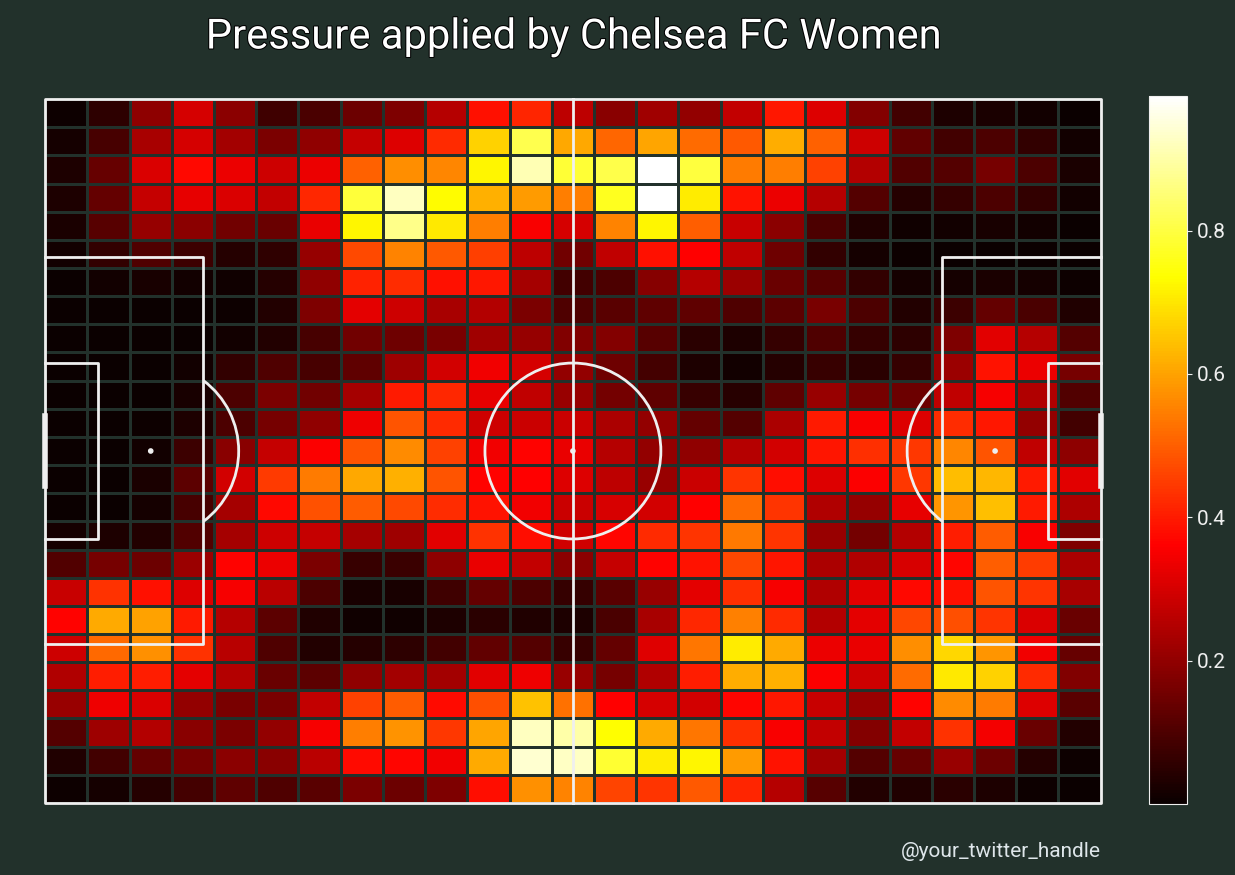

In [5]:
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      # leave some space for the colorbar
                      grid_width=0.88, left=0.025,
                      title_height=0.06, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.86)
fig.set_facecolor('#22312b')

# plot heatmap
bin_statistic = pitch.bin_statistic(df_pressure.x, df_pressure.y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap='hot', edgecolors='#22312b')

# add cbar
ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(robotto_regular.prop)
    label.set_fontsize(15)

# endnote and title
axs['endnote'].text(1, 0.5, '@your_twitter_handle', va='center', ha='right', fontsize=15,
                    fontproperties=robotto_regular.prop, color='#dee6ea')
ax_title = axs['title'].text(0.5, 0.5, "Pressure applied by Chelsea FC Women", color='white',
                             va='center', ha='center', path_effects=path_eff,
                             fontproperties=robotto_regular.prop, fontsize=30)

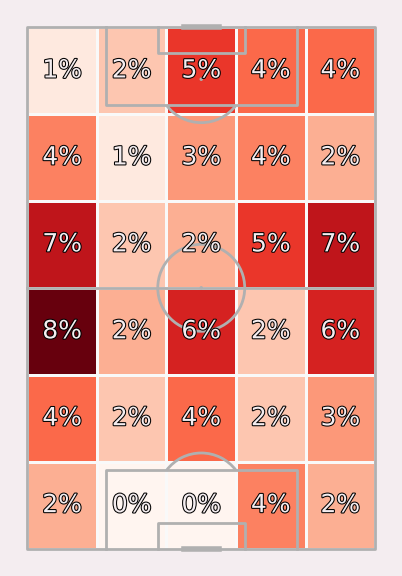

In [6]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#f4edf0')
fig, ax = pitch.draw(figsize=(4.125, 6))
fig.set_facecolor('#f4edf0')
bin_statistic = pitch.bin_statistic(df_pressure.x, df_pressure.y, statistic='count', bins=(6, 5), normalize=True)
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

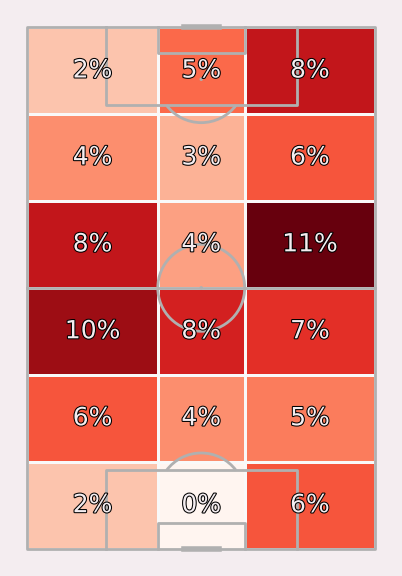

In [7]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#f4edf0')
fig, ax = pitch.draw(figsize=(4.125, 6))
fig.set_facecolor('#f4edf0')
bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=7)
bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,
                          pitch.dim.six_yard_top, pitch.dim.top]))
bin_statistic = pitch.bin_statistic(df_pressure.x, df_pressure.y, statistic='count',
                                    bins=(bin_x, bin_y), normalize=True)
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='#f9f9f9')
labels2 = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                              ax=ax, ha='center', va='center',
                              str_format='{:.0%}', path_effects=path_eff)

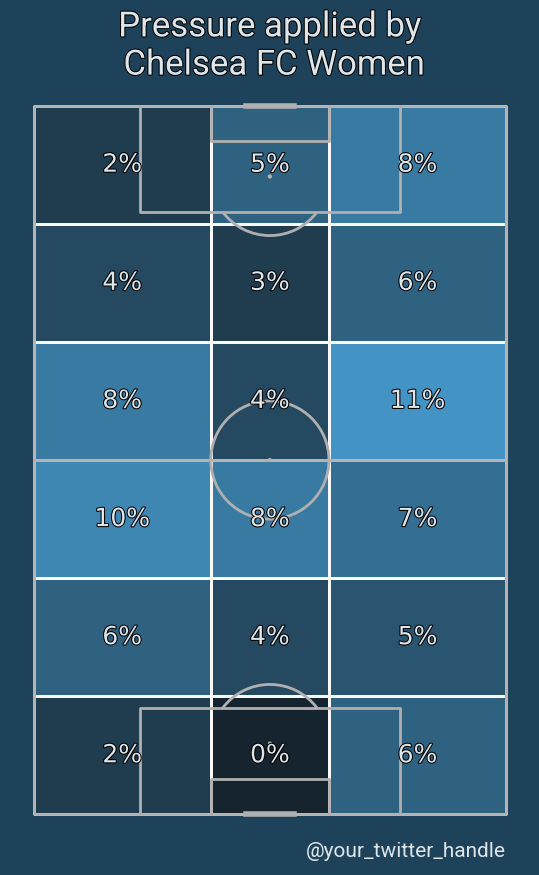

In [8]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#1e4259')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      title_height=0.08, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.84)
fig.set_facecolor('#1e4259')

bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=7)
bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,
                          pitch.dim.six_yard_top, pitch.dim.top]))
bin_statistic = pitch.bin_statistic(df_pressure.x, df_pressure.y, statistic='count',
                                    bins=(bin_x, bin_y), normalize=True)
pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap=pearl_earring_cmap, edgecolor='#f9f9f9')
labels3 = pitch.label_heatmap(bin_statistic, color='#dee6ea', fontsize=18,
                              ax=axs['pitch'], ha='center', va='center',
                              str_format='{:.0%}', path_effects=path_eff)

# endnote and title
endnote_text = axs['endnote'].text(1, 0.5, '@your_twitter_handle',
                                   va='center', ha='right', fontsize=15,
                                   fontproperties=robotto_regular.prop, color='#dee6ea')
title_text = axs['title'].text(0.5, 0.5, "Pressure applied by\n Chelsea FC Women",
                               color='#dee6ea', va='center', ha='center', path_effects=path_eff,
                               fontproperties=robotto_regular.prop, fontsize=25)

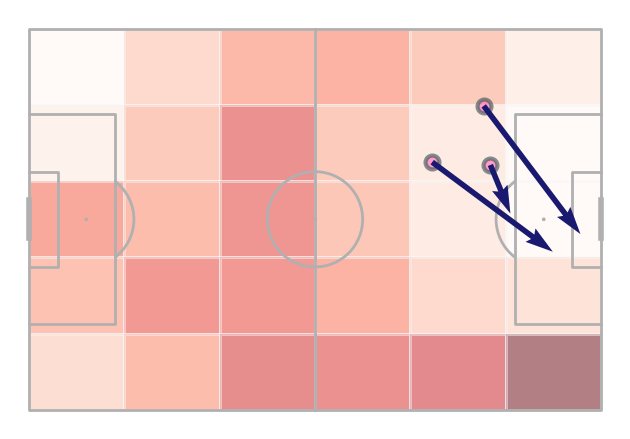

In [9]:
pitch = Pitch(line_zorder=2)
fig, ax = pitch.draw()
bin_statistic = pitch.bin_statistic(df_pass.x, df_pass.y, bins=(6, 5))
bin_statistic_end = pitch.bin_statistic(df_pass.end_x, df_pass.end_y, bins=(6, 5))

# let's get a mask for all passes that started in one grid cell and ended in another
mask_start = np.logical_and(bin_statistic['binnumber'][0] == 4,  # xs 5th box from left (zero indexed)
                            bin_statistic['binnumber'][1] == 1)  # ys 2nd from bottom (zero indexed)
mask_end = np.logical_and(bin_statistic_end['binnumber'][0] == 5,  # xs 6th box from left (zero indexed)
                          bin_statistic_end['binnumber'][1] == 2)  # ys 3rd box from bottom (zero indexed)
mask = np.logical_and(mask_start, mask_end)

# plot the passes that started in one grid cell and ended in another
pitch.scatter(df_pass.x[mask], df_pass.y[mask], ax=ax, fc='hotpink',
              marker='o', s=100, ec='darkslategrey', lw=3, alpha=0.6, zorder=4)
pitch.arrows(df_pass.x[mask], df_pass.y[mask], df_pass.end_x[mask], df_pass.end_y[mask],
             ax=ax, zorder=10, color='midnightblue')

# plot all of the starting locations as a heatmap
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='#f9f9f9', alpha=0.5)

plt.show()  # If you are using a Jupyter notebook you do not need this line